In [ ]:
 !cat /proc/meminfo

In [ ]:
!df -h

    ========= Label =========
    || natural  |        0 ||
    || art      |        1 ||
    || people   |        2 ||
    || food     |        3 ||
    ========= ===== =========
    

# people.npz 다른 데이터셋으로 진행. (model4)
- 전반적인 변화는 크게 없어보임.

# model5 생성
- 데이터개수 1만개로 증가
- 이미지 채널이 3이 아닌 것들을 누락시킨것을 3으로 바꿔 사용


In [ ]:
from tensorflow.keras import models, layers 
import numpy as np 
import PIL.Image as pilimg
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# gpu 체크해보기 
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
npzpath = './drive/MyDrive/npzs'

def __loadData(size, file):
    filename = npzpath + '/' + str(size) + '/' + file
    outfiles = np.load(filename, allow_pickle=True)
    data = outfiles['data']
    targets = outfiles['target']
    return data, targets # 다중 값 반환. 튜플타입으로 반환됨

def loadData(size, howmuch) :
    # labels = ['cartoon', 'art', 'food', 'people', 'natural']
    labels = ['natural', 'art', 'people', 'food']

    data = np.array([])
    targets = np.array([])

    for label in labels :
        name = f'{howmuch}_{label}.npz'
        d, t = __loadData(size, name)
        data = np.array([*data, *d])
        targets = np.array([*targets, *t])

    return data, targets

def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

# 정규화
def normalize(x) :
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def createModel(size) :
  model = models.Sequential([
    # 이미지 특성 추출 신경망 (CNN) 
    layers.Conv2D( 256, (3,3), padding = 'same', input_shape = (size,size,3), activation= 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D( 128, (3,3), padding = 'same', activation= 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.50),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(4, activation='softmax'), # 출력 레이어어에서 회귀모델은 activation 없음. 이진모델은 sigmoid, 다중은 softmax
  ])
  # model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def cnn_deeplearning(size, howmuch) :
  with tf.device('/device:GPU:0'):
    data, targets = loadData(size, howmuch)
    print(len(data))
    print(len(targets))
    print('==============================')
    x_train, x_test, y_train, y_test = train_test_split(data, targets, random_state=1)
    print(x_train.shape) # (3000, 150, 150, 3)
    print(y_train.shape) # (3000,)
    print(x_test.shape)
    print('==============================')

    # 합성곱 신경망은 4차원 데이터 그대로 들어가기 떄문에 reshape 를 할 필요가 없음

    # 스케일링(정규화)
    x_train = normalize(x_train)
    x_test = normalize(x_test)

    # 3. 출력데이터 - 원핫인코딩.(딥러닝에 사용되며 이진모델엔 할 필요없이 실수형 데이터로만 변환해주면 됨)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    model = createModel(size)
    print(model.summary())

    hist = model.fit( 
        x_train, y_train, 
        epochs = 20, 
        batch_size= 300, 
        validation_data= (x_test, y_test)
    ) # 학습데이터는 실수형으로 해줘야함
    # validation 정확도가 일반 정확보다 낮으면 과소 반대면 과대 

    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test)

    print(train_loss, train_acc)
    print(test_loss, test_acc)

    plot_accuracy_loss(hist)

    model.save('./drive/MyDrive/models/Main_Category5(gpu_adam).h5')

39905
39905
(29928, 100, 100, 3)
(29928,)
(9977, 100, 100, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
____________________________________________________________

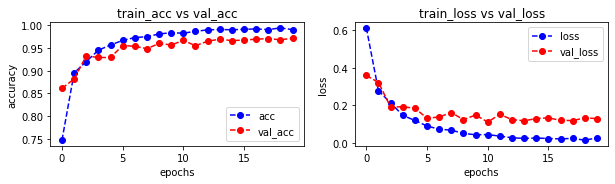

In [ ]:
cnn_deeplearning(100, 10000)

# 모델6. 사람 데이터 새로 받아와서 진행. 전부 데이터는 1567개밖에 안됨 ㅠㅠ


In [11]:
from tensorflow.keras import models, layers 
import numpy as np 
import PIL.Image as pilimg
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import os

npzpath = './drive/MyDrive/npzs'

def __loadData(size, file):
    filename = npzpath + '/' + str(size) + '/' + file
    outfiles = np.load(filename, allow_pickle=True)
    data = outfiles['data']
    targets = outfiles['target']
    return data, targets # 다중 값 반환. 튜플타입으로 반환됨

def loadData(size, howmuch) :
    labels = ['natural', 'art', 'people', 'food']

    data = np.array([])
    targets = np.array([])

    for label in labels :
        name = f'{howmuch}_{label}.npz'
        d, t = __loadData(size, name)
        data = np.array([*data, *d])
        targets = np.array([*targets, *t])

    return data, targets

def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

# 정규화
def normalize(x) :
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def createModel(size) :
  model = models.Sequential([
    # 이미지 특성 추출 신경망 (CNN) 
    layers.Conv2D( 256, (3,3), padding = 'same', input_shape = (size,size,3), activation= 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D( 128, (3,3), padding = 'same', activation= 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D( 64, (3,3), padding = 'same', activation= 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.30),
    
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(4, activation='softmax'), # 출력 레이어어에서 회귀모델은 activation 없음. 이진모델은 sigmoid, 다중은 softmax
  ])
  # model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def cnn_deeplearning(size, howmuch) :
  with tf.device('/device:GPU:0'):
    data, targets = loadData(size, howmuch)
    print(len(data))
    print(len(targets))
    print('==============================')
    x_train, x_test, y_train, y_test = train_test_split(data, targets, random_state=1)
    print(x_train.shape) # (3000, 150, 150, 3)
    print(y_train.shape) # (3000,)
    print(x_test.shape)
    print('==============================')

    # 합성곱 신경망은 4차원 데이터 그대로 들어가기 떄문에 reshape 를 할 필요가 없음

    # 스케일링(정규화)
    x_train = normalize(x_train)
    x_test = normalize(x_test)

    # 3. 출력데이터 - 원핫인코딩.(딥러닝에 사용되며 이진모델엔 할 필요없이 실수형 데이터로만 변환해주면 됨)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    model = createModel(size)
    print(model.summary())

    hist = model.fit( 
        x_train, y_train, 
        epochs = 15, 
        batch_size= 32, 
        validation_data= (x_test, y_test)
    ) # 학습데이터는 실수형으로 해줘야함
    # validation 정확도가 일반 정확보다 낮으면 과소 반대면 과대 

    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test)

    print(train_loss, train_acc)
    print(test_loss, test_acc)

    plot_accuracy_loss(hist)

    model.save('./drive/MyDrive/models/Main_Category(gpu_adam).h5')

6259
6259
(4694, 100, 100, 3)
(4694,)
(1565, 100, 100, 3)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 256)     7168      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 128)       295040    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 64)        73792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
______________________________________________________________

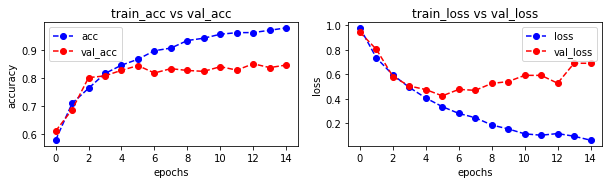

In [12]:
cnn_deeplearning(100, 1567)

adam, 에포크 30
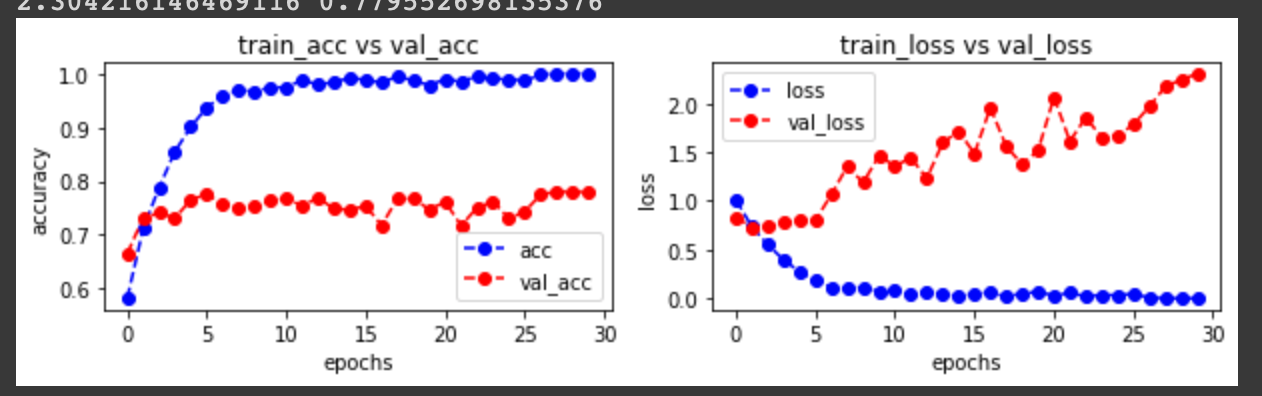

# rmsprop, 에포크30 
- 적중률 80ㅍㅓ에 ㄹㅗㅅㅡ 개높은데 이게 ㅈㅔ일 ㅂㅜㄴ류 ㅈㅏㄹ ㄷㅚ더라 

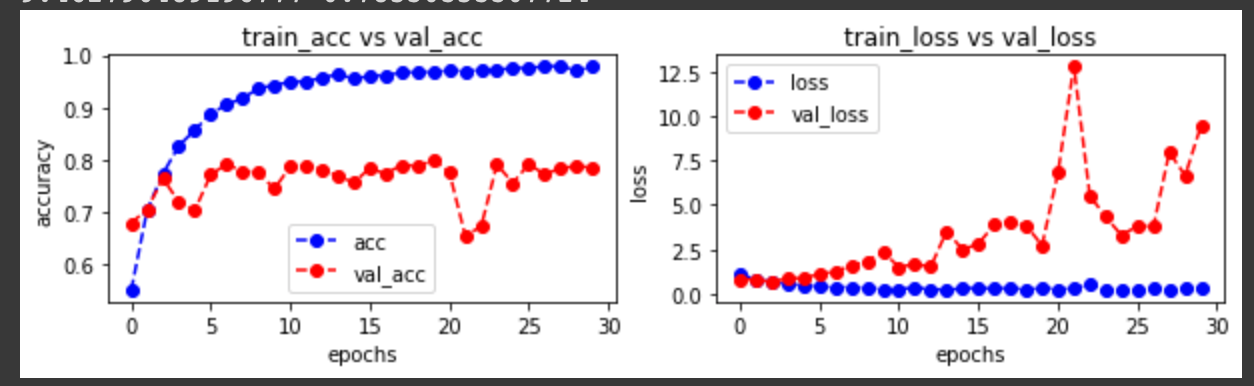

SGD, 에포크 30

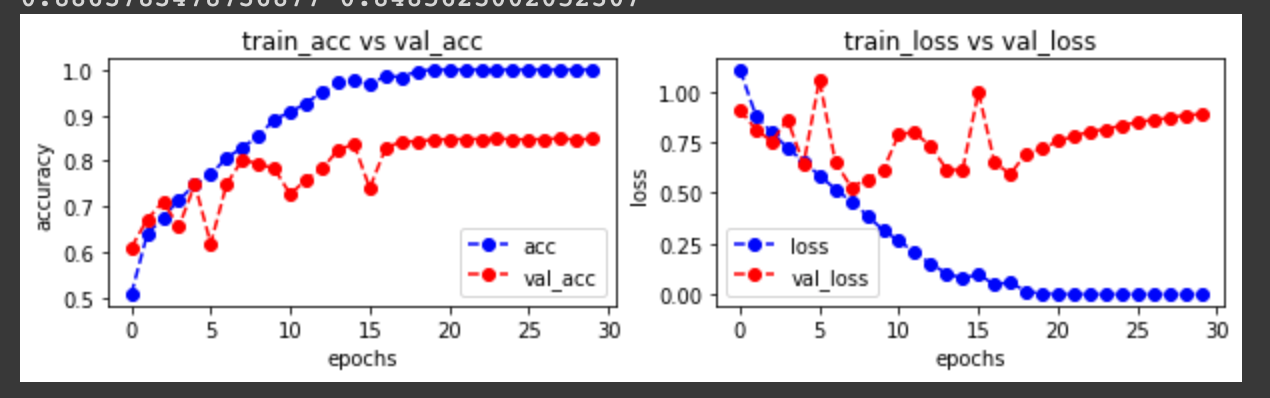

Adamax, 에포크 10 (그 이상은 train 적중률이 100퍼라서 적게함)
결과는 머 로스 적은놈들처럼 마구잡이로 사람이라 분류해주네 ㅅㅂ

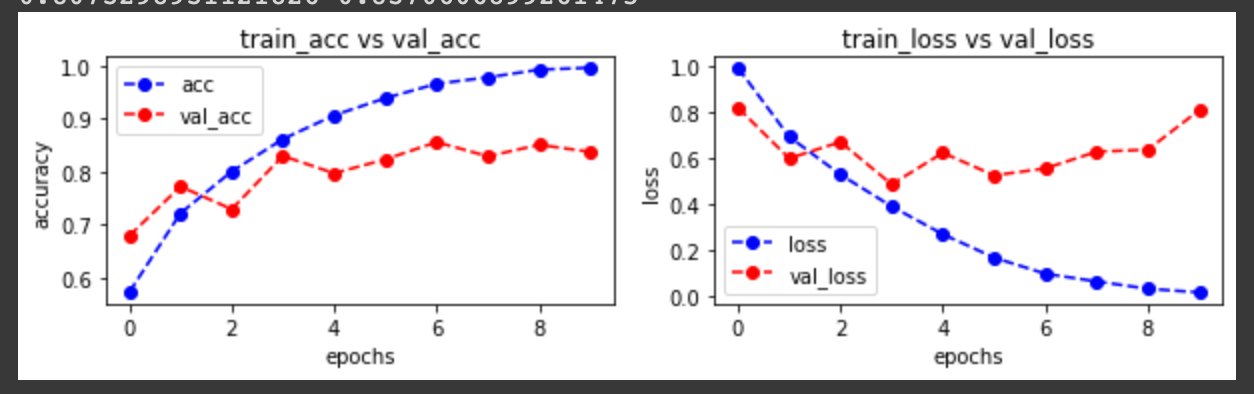